C:\Users\stack\AppData\Local\Temp\ipykernel_19824\3114147019.py:75: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(range(8192), my_list, s=0.1, c=plt.get_cmap(cmap)(0))
C:\Users\stack\AppData\Local\Temp\ipykernel_19824\3114147019.py:75: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(range(8192), my_list, s=0.1, c=plt.get_cmap(cmap)(0))


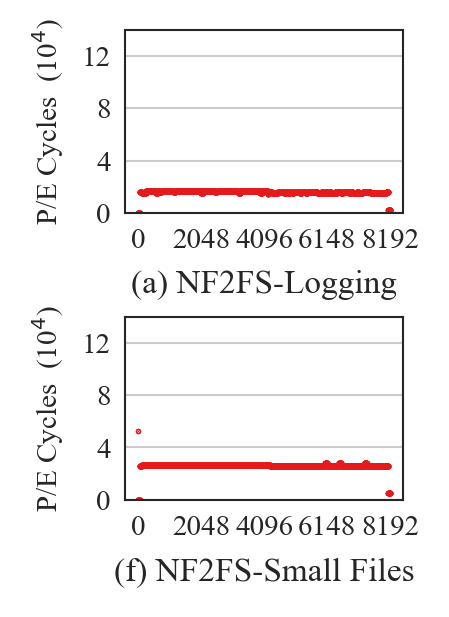

In [1]:
import matplotlib
from matplotlib.patches import ConnectionPatch
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import re
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH


def cm_to_inch(value):
    return value / 2.54


# matplotlib style settings
matplotlib.rcParams["text.usetex"] = False
style.use("seaborn-v0_8-white")
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "y"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["font.family"] = "Times New Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None

files = [
    "./N2FS_bfile_1000000.txt",
    # "./data/littlefs_predict_bfile_1000000.txt",
    # "./data/spiffs_bfile_1000000.txt",
    # "./data/spiffs_predict_bfile_1000000.txt",
    # "./data/jesfs_predict_bfile_1000000.txt",

    "./N2FS_sfile_1000000.txt",
    # "./data/littlefs_predict_sfile_1000000.txt",
    # "./data/spiffs_sfile_1000000.txt",
    # "./data/spiffs_predict_sfile_1000000.txt",
    # "./data/jesfs_predict_sfile_1000000.txt",
]

titles = [
    "(a) NF2FS-Logging",
    # "(b) LittleFS-Logging",
    # "(c) SPIFFS-Logging",
    # "(d) SPIFFS-FG-Logging",
    # "(e) JesFS-Logging",

    "(f) NF2FS-Small Files",
#     "(g) LittleFS-Small Files",
#     "(h) SPIFFS-Small Files",
#     "(i) SPIFFS-FG-Small Files",
#     "(j) JesFS-Small Files",
]

cmap = 'Set1'

fig = plt.figure(dpi=300, figsize=(cm_to_inch(DOUBLE_COL_WIDTH / 5), cm_to_inch(5)))

# labels = ['SL-Stack', 'LittleFS', 'SPIFFS', 'JesFS']

for fid, file in enumerate(files):
    # print(fid, titles[fid])
    gs0_fid = plt.subplot(2, 1, fid + 1)
    src_file = open(file)
    my_list = re.findall(r"\d+\.?\d*", src_file.read())
    my_list = [(int(i) if (int(i) < 120000) else 130000) for i in my_list]
    # new_my_list = [np.log10(int(i)) for i in my_list]
    src_file.close()

    plt.scatter(range(8192), my_list, s=0.1, c=plt.get_cmap(cmap)(0))
    gs0_fid.set_xlabel(titles[fid], fontsize=8)
    gs0_fid.set_xticks(range(0, 8192 + 1, 2048))
    gs0_fid.set_xticklabels([0, 2048, 4096, 6148, 8192], fontsize=7)

    gs0_fid.set_yticks(range(0, 120000 + 1, 40000))
    # gs0_fid.set_yticklabels([0, 3, 6, 9, 12], fontsize=7)
    gs0_fid.set_yticklabels([0, 4, 8, 12], fontsize=7)
    gs0_fid.set_ylim(0, 140000)

    # gs0_fid.set_yticks(range(0, 10, 3))
    # gs0_fid.set_yticklabels(["0", "10$^3$", "10$^6$", "10$^9$"], fontsize=7)
    # gs0_fid.set_ylim(0, 10)

    gs0_fid.set_ylabel("P/E Cycles  (10$^4$)", fontsize=7, va='bottom')
    ax = fig.gca()
    lw = 0.5
    for axis in ["top", "bottom", "left", "right"]:
        ax.spines[axis].set_linewidth(lw)
    
    # if fid == 6:
    #     plt.text(4096, 105000, "Around 250K P/E cycles", size=7, va='center', ha='center')
    # elif fid == 7:
    #     plt.text(4096, 105000, "Around 540K P/E cycles", size=7, va='center', ha='center')
    # elif fid == 9:
    #     plt.text(4096, 105000, "Around 17M P/E cycles", size=7, va='center', ha='center')


plt.tight_layout(pad=0.4)
# plt.savefig("./FIG-WL.pdf", bbox_inches="tight", pad_inches=0)
# plt.savefig("./FIG-WL.svg", bbox_inches="tight", pad_inches=0)
plt.savefig("./FIG-WL.png", bbox_inches="tight", pad_inches=0)